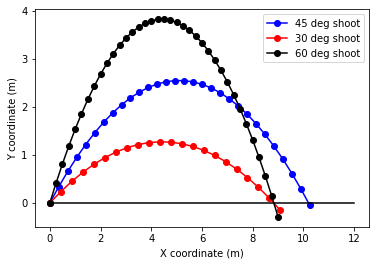

In [6]:
from math import sin, cos, radians
from matplotlib import pyplot as plt
import numpy as np

class Cannon:
  
  def __init__(self, x0, y0, v, angle):
      # initial x and y coordinates 
      self.x  = x0
      self.y  = y0
      # current value of velocity components
      self.vx  = v*cos(radians(angle))
      self.vy  = v*sin(radians(angle))

      # acceleration by x and y axes
      self.ax   = 0
      self.ay   = -9.8
      # start time
      self.time = 0

      # these list will contain discrete set of missile coordinates
      self.xarr = [self.x]
      self.yarr = [self.y]

  def updateVx(self, dt):
      self.vx = self.vx + self.ax*dt
      return self.vx
  def updateVy(self, dt):
      self.vy = self.vy + self.ay*dt
      return self.vy
  
  def updateX(self, dt):
      self.x = self.x + 0.5*(self.vx + self.updateVx(dt))*dt
      return self.x
  def updateY(self, dt):
      self.y = self.y + 0.5*(self.vy + self.updateVy(dt))*dt
      return self.y

  def step(self, dt):
      self.xarr.append(self.updateX(dt))
      self.yarr.append(self.updateY(dt))
      self.time = self.time + dt

def makeShoot(x0, y0, velocity, angle):
    """
    Returns a tuple with sequential pairs of x and y coordinates
    """
    cannon = Cannon(x0, y0, velocity, angle)
    dt = 0.05 # time step
    t = 0 # initial time
    cannon.step(dt)

    ####### MAIN #######
    while cannon.y >= 0:
        cannon.step(dt)
        t = t + dt
    ####################

    return (cannon.xarr, cannon.yarr)

def main():
    x0 = 0
    y0 = 0
    velocity = 10
    x45, y45 = makeShoot(x0, y0, velocity, 45)
    x30, y30 = makeShoot(x0, y0, velocity, 30)
    x60, y60 = makeShoot(x0, y0, velocity, 60)
    plt.plot(x45, y45, 'bo-', x30, y30, 'ro-', x60, y60, 'ko-',
        [0, 12], [0, 0], 'k-' # ground
        )
    plt.legend(['45 deg shoot', '30 deg shoot', '60 deg shoot'])
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.show()

if __name__ == '__main__':
    main()

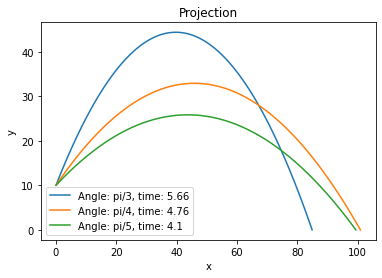

In [7]:
def project(x_i, y_i, angle, v):
    g= -9.8
    x_dot = v*np.cos(angle)
    y_dot = v*np.sin(angle)

    xs = []
    ys = []
    t = 0.001
    y = y_i +y_dot*t + 0.5*g*t**2
    ts = [t]

    while y>0:
        t+=0.001
        ts.append(t)
        x = x_i+ x_dot*t
        xs.append(x)
        y = y_i +y_dot*t + 0.5*g*t**2
        ys.append(y)
    return xs, ys, ts


xs1, ys1, ts1 = project(0, 10, np.pi/3, 30)
xs2, ys2, ts2 = project(0, 10, np.pi/4, 30)
xs3, ys3, ts3 = project(0, 10, np.pi/5, 30)

plt.plot(xs1, ys1, label = f"Angle: pi/3, time: {round(max(ts1), 2)}")
plt.plot(xs2, ys2, label =f"Angle: pi/4, time: {round(max(ts2),2)}")
plt.plot(xs3, ys3, label = f"Angle: pi/5, time: {round(max(ts3),2)}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Projection")
plt.show()

In [8]:
tolerance = 1.0**(-6)
# define values
v_0 = 10 # initial velocity
g = 9.8 # gravity
y_0 = 10 # 10 meters above ground
del_x = 15 # traveling 15 meters

# define the function where you need to find your root
def f(x):
    # we want to find the root for x(theta)
    return v_0 * np.cos(x) *(1/g*(v_0*np.sin(x)+np.sqrt(v_0**2*np.sin(x)**2+2*g*y_0))) - del_x

a, b = -np.pi/2, np.pi/2
dx = abs(a-b)

while dx > tolerance:
    mid = (a+b)/2
    #print(mid)
    # print(f(a) * f(mid))
    if (f(a) * f(mid)) < 0: # this means that 0 is between the two
        b = mid
    else:
        a = mid
    dx = abs(a-b)
    #print(dx, tolerance)
if abs(mid - np.pi/2) < tolerance:
    print("Impossible to throw at this range")
else:
    print("Approximation: ", mid)

Impossible to throw at this range


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')


def Football_3D(v0, theta, dt, g):
	# Coordination of penalty spot as the starting point of the ball
    x_array, y_array, z_array = [x0], [y0], [z0]
	
    # Calculate the moving distance and speed of the ball horizontally
    horizontal_distance = (x_target ** 2 + z_target ** 2) ** 0.5
    horizontal_speed = v0 * np.cos(theta)
    
    # Finish your code here
    # Calculate the speed for y-axis and z-axis
    x_speed = horizontal_speed * x_target / horizontal_distance
    y_speed = v0 * np.sin(theta)
    z_speed = horizontal_speed * z_target / horizontal_distance
    
    # Record the position change of the ball in x, y, and z axis
    while z_array[-1] <= 11:
      x_array.append(x_array[0] + x_speed*dt)
      y_array.append(y_array[0] + y_speed*dt + 0.5*g**2)
      z_array.append(z_array[0] + z_speed*dt)
        
    
    # Return the coordinates of all nodes in the route of ball's motion
    return x_array, y_array, z_array


x0 = 0
y0 = 0.1
z0 = 0
theta = np.pi/4
x_target = -3.5
y_target = 2.4
z_target = 11

g = -9.8
tolerance=0.01
dt = 0.001

x,y,z = Football_3D(30, theta, 0.01, g)

plt.plot(x, y ,z )
plt.xlabel("x")
plt.ylabel("y")
plt.zlabel("z")
plt.legend()
plt.title("Projection")
plt.show()